In [9]:
import numpy as np
import time

np.random.seed(0)

In [10]:
def test_time(sample_size, batch_size, do_prints=False):
    ret = []
    k_x = np.random.rand(sample_size, 21)
    new_xs = np.random.rand(batch_size, 21)

    start = time.time()
    new_rows = np.zeros((batch_size, sample_size))   # rectangular matrix
    for i in range(len(new_xs)):
        new_x = new_xs[i]

        new_row = np.sum(np.square(k_x - new_x) , axis=1) 
        new_row = np.exp(new_row)
        new_row = new_row.reshape((1, -1))

        new_rows[i] = new_row
    end = time.time()
    ret.append(end - start)
    if do_prints:
        print("Time for calculating rectangular matrix: \t", end - start)

    start = time.time()
    new_rows2 = np.array([np.sum(np.square(k_x - new_x), axis=1) for new_x in new_xs])
    end = time.time()
    ret.append(end - start)
    if do_prints:
        print("Time for calculating rectangular matrix2: \t", end - start)

    start = time.time()
    '''
    USING MESHGRID AND DSTACK --> TERRIBLY SLOWER, too much space
    it makes sense though, the array version is fast since the computation has to be done row by row
    '''
    indices = np.dstack(np.meshgrid(np.arange(k_x.shape[0]), np.arange(new_xs.shape[0]))).reshape(-1, 2)
    new_rows3 = np.sum(np.square(k_x[indices[:,0]] - new_xs[indices[:,1]]), axis=1)
    end = time.time()
    ret.append(end - start)
    if do_prints:
        print("Time for calculating rectangular matrix3: \t", end - start)

    return ret

In [11]:
print("\t200x50:")
test_time(200, 50, True)
print("\n")

print("\t1000x100:")
test_time(1000, 100, True)
print("\n")

print("\t1000x500:")
test_time(1000, 500, True)
print("\n")

print("\t1000x1000:")
test_time(1000, 1000, True)
print("\n")

print("\t2000x2000:")
test_time(2000, 2000, True)
print("\n")

print("\t10000x100:")
test_time(10000, 100, True)
print("\n")

print("\t100000x100:")
test_time(100000, 100, True)
print("\n")

# print("\t5000x5000:")
# test_time(5000, 5000, True)
# print("\n")

# print("\t10000x10000:")
# test_time(10000, 10000, True)
# print("\n")

	200x50:
Time for calculating rectangular matrix: 	 0.0019974708557128906
Time for calculating rectangular matrix2: 	 0.0019919872283935547
Time for calculating rectangular matrix3: 	 0.0


	1000x100:
Time for calculating rectangular matrix: 	 0.019082069396972656
Time for calculating rectangular matrix2: 	 0.009030342102050781
Time for calculating rectangular matrix3: 	 0.03600573539733887


	1000x500:
Time for calculating rectangular matrix: 	 0.05519270896911621
Time for calculating rectangular matrix2: 	 0.05367636680603027


Time for calculating rectangular matrix3: 	 0.2028334140777588


	1000x1000:
Time for calculating rectangular matrix: 	 0.09543538093566895
Time for calculating rectangular matrix2: 	 0.08151102066040039
Time for calculating rectangular matrix3: 	 0.33538103103637695


	2000x2000:
Time for calculating rectangular matrix: 	 0.335939884185791
Time for calculating rectangular matrix2: 	 0.3729569911956787


KeyboardInterrupt: 

### meshgrid

In [ ]:
import numpy as np
np.random.seed(0)

sample_size = 3
batch_size = 2

kx = np.arange(sample_size)
kmat = np.arange(sample_size**2).reshape((sample_size, sample_size))
new_xs = np.ones(batch_size) * 3
new_kmat = np.arange(batch_size**2).reshape((batch_size, batch_size))+9

print(kmat)
print(new_kmat)

# compute rectangular matrix the old way
new_rows = np.array([np.square(kx - new_x) for new_x in new_xs])
print(new_rows)

# compute rectangular matrix in one go with np.meshgrid
new_rows2 = np.dstack(np.meshgrid(kx, new_xs)).reshape(-1, 2)
new_rows2 = np.square(new_rows2[:, 0] - new_rows2[:, 1]).reshape(batch_size, sample_size)
print(new_rows2)



[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[ 9 10]
 [11 12]]
[[9. 4. 1.]
 [9. 4. 1.]]
[array([[0, 1, 2],
       [0, 1, 2]]), array([[3., 3., 3.],
       [3., 3., 3.]])]
[[9. 4. 1.]
 [9. 4. 1.]]


### np from two arrays keep maximum M elements

In [ ]:
import numpy as np
np.random.seed(2)

delta = np.random.randint(0, 10, size=10)
new_xs_deltas = np.random.randint(0, 8, size=3)

print("delta: ", np.sort(delta), "\tnew_xs_deltas: ", np.sort(new_xs_deltas))

merged = np.hstack((delta, new_xs_deltas))
sorted = np.sort(merged)
newdelta = sorted[:delta.shape[0]]

# discarded from old delta
discarded = np.setdiff1d(delta, newdelta, assume_unique=True)
print("discarded: ", np.sort(discarded))

# kept from old delta
kept = np.setdiff1d(delta, discarded, assume_unique=True)
print("kept: ", np.sort(kept))

# added from new_xs_deltas
added = np.setdiff1d(newdelta, kept, assume_unique=True)
added2 = np.delete(newdelta, np.searchsorted(newdelta, kept))
print("delta: ", np.sort(delta), "\tnew_xs_deltas: ", np.sort(new_xs_deltas))
print("added: ", np.sort(added), "\tadded2: ", np.sort(added2))

delta:  [1 2 2 4 5 6 7 8 8 8] 	new_xs_deltas:  [4 4 5]
discarded:  [8 8 8]
kept:  [1 2 2 4 5 6 7]
delta:  [1 2 2 4 5 6 7 8 8 8] 	new_xs_deltas:  [4 4 5]
added:  [] 	added2:  [2 4 4 5]


In [ ]:
import numpy as np
np.random.seed(5)

delta = np.random.randint(0, 10, size=5)
new_xs_deltas = np.random.randint(0, 8, size=3)

new_xs_deltas[-1] = 8
new_xs_deltas[-2] = 2

print("delta: ", delta, "\tnew_xs_deltas: ", new_xs_deltas)

#take the worst (max) delta items, length of new_xs_deltas
worst_deltas = np.where(np.isin(delta, np.sort(delta)[::-1][:new_xs_deltas.shape[0]]))[0]
print("worst_deltas: ", np.sort(worst_deltas), " ==> ", delta[worst_deltas])

# compare worst_deltas with new_xs_deltas, keep the best ones (min)
kept = np.sort( np.concatenate((delta[worst_deltas], new_xs_deltas)) )[:new_xs_deltas.shape[0]]
# kept = np.minimum(delta[worst_deltas], new_xs_deltas)
print("kept: ", kept)

# find the worst deltas that have not been kept, without using set functions
new_xs_toadd = np.delete(kept, np.where(np.isin(kept, delta[worst_deltas])))
# old_delta_toremove = np.delete(, np.where(np.isin(delta[worst_deltas], kept)))
print("new_xs_toadd: ", new_xs_toadd)

# calculate the index of the new x delta to add
new_xs_toadd_indices = np.isin(new_xs_deltas, new_xs_toadd)
print("new_xs_toadd_indices: ", new_xs_toadd_indices)
new_xs_toadd = new_xs_deltas[new_xs_toadd_indices]
print("new_xs_toadd: ", new_xs_toadd)
np.where(np.isin(new_xs_deltas, new_xs_toadd))[0]

delta:  [3 6 6 0 9] 	new_xs_deltas:  [0 2 8]
worst_deltas:  [1 2 4]  ==>  [6 6 9]
kept:  [0 2 6]
new_xs_toadd:  [0 2]
new_xs_toadd_indices:  [ True  True False]
new_xs_toadd:  [0 2]


array([0, 1], dtype=int64)

In [ ]:
import numpy as np
np.random.seed(5)

delta = np.random.randint(0, 10, size=5)
new_xs_deltas = np.random.randint(0, 8, size=3)

new_xs_deltas[-1] = 8
new_xs_deltas[-2] = 7

print("delta: ", delta, "\tnew_xs_deltas: ", new_xs_deltas)

newdelta = np.sort(np.concatenate((delta, new_xs_deltas)))[:delta.shape[0]]
print("newdelta: ", newdelta)

old_tokeep_idx = np.where(delta[np.isin(newdelta, delta)])[0]
old_tokeep = delta[old_tokeep_idx]
old_todelete = np.delete(delta, old_tokeep_idx)
print("old_tokeep: ", old_tokeep, "\told_tokeep_idx: ", old_tokeep_idx , "\told_todelete: ", old_todelete)

new_xs_toadd = np.sort(new_xs_deltas)[:old_todelete.shape[0]]
new_xs_toadd_idx = np.where(new_xs_deltas[np.isin(new_xs_deltas, new_xs_toadd)])[0]
print("new_xs_toadd: ", new_xs_toadd, "\tnew_xs_toadd_idx: ", new_xs_toadd_idx)

np.where(delta[np.isin(newdelta,delta)])


delta:  [3 6 6 0 9] 	new_xs_deltas:  [0 7 8]
newdelta:  [0 0 3 6 6]
old_tokeep:  [3 6 6 9] 	old_tokeep_idx:  [0 1 2 4] 	old_todelete:  [0]
new_xs_toadd:  [0] 	new_xs_toadd_idx:  []


(array([0, 1, 2, 4], dtype=int64),)

In [ ]:

'''
# X = set difference bw tokeep and self.delta, to remain only with the new to add
toadd = np.setdiff1d(newdelta, delta, assume_unique=True)
toadd2 = np.delete(newdelta, newdelta[np.in1d(delta, newdelta)])

# Y = set diff bw self.delta and X to find those to discard
old_tokeep = np.setdiff1d(newdelta, toadd2, assume_unique=True)
todiscard = np.setdiff1d(delta, old_tokeep, assume_unique=True)

print("delta:",np.sort(delta),"\tnew xs deltas:", np.sort(new_xs_deltas))
print()

print("new delta:", newdelta)
print("toadd:", toadd, "\ttoadd2:", toadd2)
print("old but kept:", old_tokeep, "\ttodiscard:", np.sort(todiscard))
'''

In [ ]:
import numpy as np
np.random.seed(5)

# delta = np.random.randint(0, 10, size=5)
# new_xs_deltas = np.random.randint(0, 8, size=3)

# new_xs_deltas[-1] = 8
# new_xs_deltas[-2] = 7

delta = np.array([0,8,0,0,4,0,7])
new_xs_deltas = np.array([0,3,2,8,2])

merged = np.hstack((delta, new_xs_deltas))
sorted = np.sort(merged)
newdelta = sorted[:delta.shape[0]]
discarded = sorted[delta.shape[0]:]

# for x in toremove:
#     if x in newdelta:
#         newdelta = np.delete(newdelta, np.where(newdelta==x)[0][0])

print("delta:",delta,"\tnew xs deltas:", new_xs_deltas)
print("merged:", merged)
print("sorted:", sorted)
print("new delta:", newdelta, "\tdiscarded:", discarded)



# a = np.not_equal(np.sort(delta), newdelta)
# toremove = np.sort(delta)[a]
toremove_idx = np.where(np.isin(delta, np.sort(delta)[np.not_equal(np.sort(delta), newdelta)]))[0]
print("toremove from kmat:", delta[toremove_idx], "\ttoremove_idx:", toremove_idx)

print("\n=========================\n")


new_xs_deltas = np.sort(new_xs_deltas) [:toremove_idx.shape[0]]
print("toadd_xs:", new_xs_deltas)


delta: [0 8 0 0 4 0 7] 	new xs deltas: [0 3 2 8 2]
merged: [0 8 0 0 4 0 7 0 3 2 8 2]
sorted: [0 0 0 0 0 2 2 3 4 7 8 8]
new delta: [0 0 0 0 0 2 2] 	discarded: [3 4 7 8 8]
toremove from kmat: [8 4 7] 	toremove_idx: [1 4 6]


toadd_xs: [0 2 2]


In [ ]:
import numpy as np

delta = np.array([0,8,0,0,4,0,7])
amount = 2

idx = np.argsort(delta)[::-1][:amount]
print("idx:", idx)

idx: [1 6]


In [ ]:
from collections import deque

a = deque(range(10,20))
print(a)
del a[8]
print(a)

deque([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])
deque([10, 11, 12, 13, 14, 15, 16, 17, 19])


### testing matrix_inverse_remove_i.py
(CORRECTLY WORKING!!!)

In [ ]:
import numpy as np
np.random.seed(5)
from matrix_inverse_remove import matrix_inverse_remove_i

# matrix 5by5
A = np.random.randint(0, 10, size=(5,5))
Ainv = np.linalg.inv(A)
print("A:\n", A, "\nAinv:\n", Ainv)

# remove row and column 4
A_remove4 = np.delete(np.delete(A, 4, axis=0), 4, axis=1)
Ainv_remove4 = matrix_inverse_remove_i(Ainv, 4)
Ainv2 = np.linalg.inv(A_remove4)
print("Ainv:\n", Ainv_remove4)
print("Ainv2:\n", Ainv2)
print("A\\4:\n", A_remove4)

# check that Ainv is the inverse of A
print("Ainv*A\\4:\n", np.matmul(Ainv_remove4, A_remove4))

A:
 [[3 6 6 0 9]
 [8 4 7 0 0]
 [7 1 5 7 0]
 [1 4 6 2 9]
 [9 9 9 1 2]] 
Ainv:
 [[ 0.41666667  0.07894737  0.13157895 -0.38157895 -0.15789474]
 [ 0.00925926 -0.26608187 -0.01754386 -0.06578947  0.25438596]
 [-0.48148148  0.20467836 -0.14035088  0.47368421  0.03508772]
 [-0.07407407 -0.1871345   0.11403509  0.05263158  0.09649123]
 [ 0.28703704  0.01461988  0.06140351 -0.14473684 -0.14035088]]
a [[ 0.41666667  0.07894737  0.13157895 -0.38157895]
 [ 0.00925926 -0.26608187 -0.01754386 -0.06578947]
 [-0.48148148  0.20467836 -0.14035088  0.47368421]
 [-0.07407407 -0.1871345   0.11403509  0.05263158]]
b [-0.15789474  0.25438596  0.03508772  0.09649123]
c [ 0.28703704  0.01461988  0.06140351 -0.14473684]
d -0.14035087719298245
Ainv:
 [[ 0.09375     0.0625      0.0625     -0.21875   ]
 [ 0.52951389 -0.23958333  0.09375    -0.328125  ]
 [-0.40972222  0.20833333 -0.125       0.4375    ]
 [ 0.12326389 -0.17708333  0.15625    -0.046875  ]]
Ainv2:
 [[ 0.09375     0.0625      0.0625     -0.21875   ]
 

### test some kernel matrices

In [ ]:
from BIGPR import *
import numpy as np
np.set_printoptions(precision=2)
np.random.seed(5)

def load_csv(file_name):
    with open(file_name, "r") as f:
        reader = csv.reader(f)
        columns = [row for row in reader]

    columns = np.array(columns)
    
    m_x, n_x = columns.shape
    data_set = np.zeros((m_x, n_x))
    for i in range(m_x):
        for j in range(n_x):
            data_set[i][j] = float(columns[i][j])
    return data_set

training_set = load_csv('training_set.csv')
training_target = load_csv('training_target.csv')
test_set = load_csv('test_set.csv')
test_target = load_csv('test_target.csv')


In [ ]:

igpr = BIGPR(init_x=training_set[0,:], init_y=training_target[0,:])
igpr2 = BIGPR(init_x=training_set[0,:], init_y=training_target[0,:])

max_kmat_size = 100

igpr.max_k_matrix_size = max_kmat_size 
igpr2.max_k_matrix_size = max_kmat_size 

DATA_AMT = 200
batch_size = 7

x = training_set[1:DATA_AMT,:]
y = training_target[1:DATA_AMT,:]

print(x.shape, y.shape)
print("===============================")

for j in range(0, len(x), batch_size):
    e = j+batch_size if j+batch_size < len(x) else len(x)
    # TODO print deltas
    # print(np.array(igpr.delta))
    # print("e ", e)
    igpr.learn_batch(x[j:e,:], y[j:e,:])
# print("===============================")

for i in range(len(x)):
    # TODO print deltas
    # print(np.array(igpr2.delta))
    igpr2.learn(x[i,:], y[i,:])
# print("last i:", i)

# print("===============================")

print(igpr.k_matrix, igpr.k_matrix.shape)
print("===============================")
print(igpr2.k_matrix, igpr2.k_matrix.shape)
print("===============================")
# print(np.equal(igpr.k_matrix, igpr2.k_matrix))
print(np.abs(np.rint(np.matmul(igpr.k_matrix, igpr.inv_k_matrix))))
print(np.abs(np.rint(np.matmul(igpr2.k_matrix, igpr2.inv_k_matrix))))

print("are the inverses the same? ", np.allclose(igpr.inv_k_matrix, igpr2.inv_k_matrix))
print("are the matrices the same?" , np.equal(igpr.k_matrix, igpr2.k_matrix))


(199, 21) (199, 7)


AttributeError: 'IGPR' object has no attribute 'informativity'

In [ ]:
info = igpr.info_mat
kmat = igpr.k_matrix
for i in range(len(info)):
    print("i:", i, end=" --> ") 
    # "\tinfo:", info[i])
    print(kmat[i,info[i]].shape)

print(kmat[-1].shape, info[-1].shape)

info

i: 0 --> (5,)
i: 1 --> (5,)
i: 2 --> (5,)
i: 3 --> (5,)
i: 4 --> (5,)
i: 5 --> (9,)
i: 6 --> (9,)
i: 7 --> (9,)
i: 8 --> (9,)
i: 9 --> (13,)
i: 10 --> (13,)
i: 11 --> (13,)
i: 12 --> (13,)
i: 13 --> (17,)
i: 14 --> (17,)
i: 15 --> (17,)
i: 16 --> (17,)
i: 17 --> (20,)
i: 18 --> (20,)
i: 19 --> (20,)
(20,) (20,)


deque([array([1, 2, 3, 4, 0], dtype=int64),
       array([2, 0, 3, 4, 1], dtype=int64),
       array([3, 1, 4, 0, 2], dtype=int64),
       array([2, 4, 1, 0, 3], dtype=int64),
       array([3, 2, 1, 0, 4], dtype=int64),
       array([6, 4, 7, 8, 3, 2, 1, 0, 5], dtype=int64),
       array([7, 5, 8, 4, 3, 2, 1, 0, 6], dtype=int64),
       array([6, 8, 5, 4, 3, 2, 1, 0, 7], dtype=int64),
       array([7, 6, 5, 4, 3, 2, 1, 0, 8], dtype=int64),
       array([ 8, 10, 11,  7, 12,  6,  5,  4,  3,  2,  1,  0,  9], dtype=int64),
       array([ 9, 11,  8, 12,  7,  6,  5,  4,  3,  2,  1,  0, 10], dtype=int64),
       array([10, 12,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0, 11], dtype=int64),
       array([11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0, 12], dtype=int64),
       array([14, 12, 15, 11, 16, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0, 13],
             dtype=int64),
       array([15, 13, 12, 16, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0, 14],
             dtype=int64),
       array

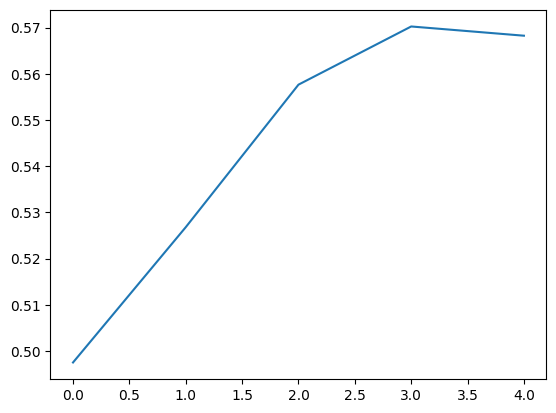

In [ ]:
means = []
for j in range(0, len(x), batch_size):
    e = j+batch_size if j+batch_size < len(x) else len(x)
    # TODO print deltas
    # print(np.array(igpr.delta))
    # print("e ", e)
    igpr.learn_batch(x[j:e,:], y[j:e,:])
    means.append(igpr.k_matrix.mean())

from matplotlib import pyplot as plt
plt.plot(means)
plt.show()

### a matrix with a transposed row and col is still I if mul by its inverse?

#### answer: YES

In [ ]:
import numpy as np
np.random.seed(0)
#matrix

mat = np.random.randint(0,10,size=(5,5))
invmat = np.linalg.inv(mat)

mat_mul_inv = np.matmul(mat, invmat)

print(np.abs(np.rint(mat_mul_inv)))

i=2 #move row 2 to position -1
print(mat)

mat[[i,-1],:] = mat[[-1,i], :]
mat[:,[i,-1]] = mat[:,[-1,i]]
print(mat)

mat_mul_inv2 = np.matmul(mat, invmat)

print(np.abs(np.rint(mat_mul_inv)))


[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
[[5 0 3 3 7]
 [9 3 5 2 4]
 [7 6 8 8 1]
 [6 7 7 8 1]
 [5 9 8 9 4]]
[[5 0 7 3 3]
 [9 3 4 2 5]
 [5 9 4 9 8]
 [6 7 1 8 7]
 [7 6 1 8 8]]
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


### np.delete on matrix

In [ ]:
import numpy as np
np.random.seed(0)
from matrix_inverse_remove import matrix_inverse_remove_i

m = np.random.randint(0,10,(4,4))
m_inv = np.linalg.inv(m)

#print mul
print(np.abs(np.rint(np.matmul(m, m_inv))))

print(m)
m = np.delete(m, 2, axis=1)
m = np.delete(m, 2, axis=0)
print(m)

m_inv = matrix_inverse_remove_i(m_inv, 2)

#print mul
print(np.abs(np.rint(np.matmul(m, m_inv))))


[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]
 [8 8 1 6]]
[[5 0 3]
 [7 9 5]
 [8 8 6]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


### np.maximum between  n,1  and  n,x

In [ ]:
import numpy as np
np.random.seed(42)

n = 6
x = 4

a = np.ones(n, dtype=np.int32)*np.random.randint(12,19)

b = np.random.randint(1,20, size=(x,n))

print(a)
print(b)

print("\n==================\n")

p=np.max(b, axis=0)
print(p)
np.max((a,p), axis=0)


[18 18 18 18 18 18]
[[15 11  8  7 19 11]
 [11  4  8  3  2 12]
 [ 6  2  1 12 12 17]
 [10 16 15 15 19 12]]


[15 16 15 15 19 17]


array([18, 18, 18, 18, 19, 18])

In [ ]:
import numpy as np

A = np.arange(10)
A = np.array((A,A,A,A))
B = np.array([2,4,5,7])

# i would like the result
# res = [A+2, A+4, A+5, A+7]

### np.array(deque()) does it copy of not?

answer: NO

In [ ]:
import numpy as np
from collections import deque

a = deque([1,2,3,4])
b = np.array(a)
b+=4
b,a

(array([5, 6, 7, 8]), deque([1, 2, 3, 4]))

### np.argmax gets the first or a list of argmaxes if more than one?

In [ ]:
import numpy as np

a = np.array([0,1,3,4,5,4,5])
m = np.max(a)
np.where(np.isin(a,m))[0].max()

np.delete(a,3)

array([0, 1, 3, 5, 4, 5])

### from kernel matrix compute informativity array 

In [ ]:
from BIGPR import *
import numpy as np
np.set_printoptions(precision=3)
np.random.seed(5)

def load_csv(file_name):
    with open(file_name, "r") as f:
        reader = csv.reader(f)
        columns = [row for row in reader]

    columns = np.array(columns)
    m_x, n_x = columns.shape
    data_set = np.zeros((m_x, n_x))
    for i in range(m_x):
        for j in range(n_x):
            data_set[i][j] = float(columns[i][j])
    return data_set

training_set = load_csv('training_set.csv')
training_target = load_csv('training_target.csv')
test_set = load_csv('test_set.csv')
test_target = load_csv('test_target.csv')

In [ ]:
igpr = BIGPR(init_x=training_set[0,:], init_y=training_target[0,:])

max_kmat_size = 100

igpr.max_k_matrix_size = max_kmat_size 

DATA_AMT = 1000
batch_size = 3

x = training_set[1:DATA_AMT,:]
y = training_target[1:DATA_AMT,:]

print(x.shape, y.shape)
print("===============================")

for j in range(0, len(x), batch_size):
    e = j+batch_size if j+batch_size < len(x) else len(x)
    igpr.learn_batch(x[j:e,:], y[j:e,:])


print(igpr.k_matrix, igpr.k_matrix.shape)
print("===============================")
print(np.abs(np.rint(np.matmul(igpr.k_matrix, igpr.inv_k_matrix))))
print(np.abs(np.rint(np.matmul(igpr.k_matrix, np.linalg.inv(igpr.k_matrix)))))
print("===============================")
print(np.allclose(igpr.inv_k_matrix, np.linalg.inv(igpr.k_matrix)))

(999, 21) (999, 7)
[[1.01  0.524 0.313 ... 0.168 0.116 0.046]
 [0.524 1.01  0.822 ... 0.182 0.113 0.061]
 [0.313 0.822 1.01  ... 0.185 0.13  0.079]
 ...
 [0.168 0.182 0.185 ... 1.01  0.525 0.207]
 [0.116 0.113 0.13  ... 0.525 1.01  0.255]
 [0.046 0.061 0.079 ... 0.207 0.255 1.01 ]] (100, 100)
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
True


In [ ]:
import numpy as np
np.random.seed(0)
np.printoptions(precision=2)

km = np.random.randint(0,10,size=(100,100), dtype=np.int32)
km_inv = np.linalg.inv(km)
km[[2,-1],:] = km[[-1,2], :]
km[:,[2,-1]] = km[:,[-1,2]]
km_inv[[2,-1],:] = km_inv[[-1,2], :]
km_inv[:,[2,-1]] = km_inv[:,[-1,2]]
print(np.abs(np.rint(np.matmul(km, km_inv))))
print(km_inv)
idx = 2
print(km[idx,:])
km = np.delete(km, idx, axis=1)
km = np.delete(km, idx, axis=0)
from matrix_inverse_remove import matrix_inverse_remove_i
km_inv = matrix_inverse_remove_i(km_inv, idx)

print("===============================")
print(np.abs(np.rint(np.matmul(km, km_inv))))
print(np.abs(np.rint(np.matmul(km, np.linalg.inv(km)))))
print("===============================")

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
[[ 0.00908579 -0.00386452  0.00989353 ...  0.01575253  0.01198646
  -0.01061993]
 [-0.05001289  0.03392263  0.07617108 ...  0.04039016  0.05799328
  -0.1126819 ]
 [ 0.02960187  0.01819268  0.0007117  ... -0.00532599 -0.00852206
   0.04728897]
 ...
 [ 0.03502574  0.02970915  0.01194296 ...  0.02267534 -0.00578501
   0.01202483]
 [ 0.03491446 -0.02598895  0.0619368  ...  0.01808543 -0.04151787
   0.0473221 ]
 [-0.02059919 -0.00772009  0.1040206  ...  0.02629731 -0.02679101
  -0.01041278]]
[3 7 0 6 3 8 8 5 6 4 6 0 1 2 3 2 7 8 6 2 2 9 5 0 2 1 8 8 3 8 3 2 6 0 4 6 8
 5 8 0 6 8 7 0 9 4 4 0 7 6 6 4 1 4 9 4 2 1 3 8 4 1 9 7 2 4 9 3 2 8 4 4 8 6
 7 2 6 3 4 6 9 8 8 9 5 1 9 6 8 8 4 7 7 4 1 2 8 0 8 1]
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 

In [ ]:
mat0 = np.array([[0,1,2,3], [1,2,3,4], [2,3,4,5], [3,4,5,6]])
mat = mat0.copy()
print(mat)

# move row, col 1 to last, then remove last, then move back
del_idx = 1

mat[[del_idx,-1],:] = mat[[-1,del_idx], :]
mat[:,[del_idx,-1]] = mat[:,[-1,del_idx]]
print(mat)


mat = np.delete(mat, -1, axis=1)
mat = np.delete(mat, -1, axis=0)
print(mat)

indxs1 = np.arange(mat.shape[0])
rolled = indxs1[del_idx:]

rolled = np.roll(rolled, -1)
indxs2 = indxs1.copy()
indxs2[del_idx:] = rolled

mat[indxs1,:] = mat[indxs2,:]
mat[:,indxs1] = mat[:,indxs2]
print(mat)

print(np.delete(np.delete(mat0, del_idx, axis=1), del_idx, axis=0))


[[0 1 2 3]
 [1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]]
[[0 3 2 1]
 [3 6 5 4]
 [2 5 4 3]
 [1 4 3 2]]
[[0 3 2]
 [3 6 5]
 [2 5 4]]
[[0 2 3]
 [2 4 5]
 [3 5 6]]
[[0 2 3]
 [2 4 5]
 [3 5 6]]


In [ ]:
from BIGPR import *
import numpy as np
np.set_printoptions(precision=2)
np.random.seed(5)

def load_csv(file_name):
    with open(file_name, "r") as f:
        reader = csv.reader(f)
        columns = [row for row in reader]

    columns = np.array(columns)
    
    m_x, n_x = columns.shape
    data_set = np.zeros((m_x, n_x))
    for i in range(m_x):
        for j in range(n_x):
            data_set[i][j] = float(columns[i][j])
    return data_set

training_set = load_csv('training_set.csv')
training_target = load_csv('training_target.csv')
test_set = load_csv('test_set.csv')
test_target = load_csv('test_target.csv')


In [ ]:
#now lets say we have removed item at index 5 from kmat, what happens to informativity?
#remove the value 5 from informativity idx matrix
#sub 1 to all indices >5
# informativity = info_array_idx[:,0]

km = kmat.copy()

km = np.delete(km, 5, axis=1)
km = np.delete(km, 5, axis=0)

km, km.shape

info_idx = info_array_idx.copy()
sss = np.where(np.isin(info_idx, 5))
print(np.array(sss).T)
# info_idx = np.delete(info_idx, ).reshape(info_idx.shape[0], info_idx.shape[1]-1)
# print(info_idx)
# for s in range(len(sss)): del info_idx[sss[0][s]][sss[1][s]]
# a = info_idx[0]
for i in range(len(info_idx)): 
    info_idx[i]=np.delete(info_idx[i], np.where(np.isin(info_idx[i], 5)))
    info_idx[i][info_idx[i]>5]-=1

del info_idx[5]

print(np.array(info_idx))
inf = np.array(info_idx)
rows = np.repeat(np.arange(inf.shape[0]), inf.shape[1]).reshape(inf.shape)
inf = np.append(inf, np.zeros((inf.shape[0]-1, 1)), axis=1)
rows = np.append(rows, np.zeros((rows.shape[0]-1, 1))+inf.shape[0], axis=1)
print(rows)
print(km[rows, inf])


[[ 0 66]
 [ 1  8]
 [ 2  3]
 [ 3  2]
 [ 4  0]
 [ 5 99]
 [ 6  1]
 [ 7  4]
 [ 8  7]
 [ 9  9]
 [10 10]
 [11 12]
 [12 32]
 [13 55]
 [14 79]
 [15 82]
 [16 87]
 [17 93]
 [18 93]
 [19 93]
 [20 93]
 [21 93]
 [22 93]
 [23 93]
 [24 93]
 [25 90]
 [26 85]
 [27 54]
 [28 57]
 [29 61]
 [30 68]
 [31 85]
 [32 93]
 [33 93]
 [34 93]
 [35 93]
 [36 93]
 [37 93]
 [38 93]
 [39 93]
 [40 93]
 [41 93]
 [42 93]
 [43 93]
 [44 93]
 [45 93]
 [46 93]
 [47 93]
 [48 93]
 [49 93]
 [50 93]
 [51 93]
 [52 93]
 [53 93]
 [54 93]
 [55 93]
 [56 93]
 [57 93]
 [58 93]
 [59 93]
 [60 93]
 [61 93]
 [62 93]
 [63 93]
 [64 93]
 [65 93]
 [66 93]
 [67 93]
 [68 93]
 [69 93]
 [70 93]
 [71 93]
 [72 93]
 [73 93]
 [74 93]
 [75 93]
 [76 93]
 [77 93]
 [78 93]
 [79 93]
 [80 93]
 [81 93]
 [82 93]
 [83 93]
 [84 93]
 [85 93]
 [86 93]
 [87 93]
 [88 93]
 [89 93]
 [90 93]
 [91 93]
 [92 93]
 [93 93]
 [94 93]
 [95 93]
 [96 93]
 [97 93]
 [98 93]
 [99 93]]
[[ 1  2 24 ... 11 12  0]
 [ 2  0  3 ... 50 51  1]
 [ 3  1  4 ... 98 51  2]
 ...
 [95 97 94 ...  1  

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 99 and the array at index 1 has size 98

### can I translate a deque of np arrays of different sizes to a np array? 

In [ ]:
import numpy as np
from collections import deque

matrix = np.zeros((10,10))

a = np.array([1,2,3,4,5,6,7,8,9])
b = np.array([1,2,3,4,5,6,7,8,9])
c = np.array([1,2,3,4,5,6,7,8,0])

x = deque([a,b,c])

rows = np.repeat(np.arange(3), 9).reshape(3,9)

matrix[rows, x]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

### remove samples usage

In [ ]:
from BIGPR import *
import numpy as np
np.set_printoptions(precision=3)
np.random.seed(5)

def load_csv(file_name):
    with open(file_name, "r") as f:
        reader = csv.reader(f)
        columns = [row for row in reader]

    columns = np.array(columns)
    m_x, n_x = columns.shape
    data_set = np.zeros((m_x, n_x))
    for i in range(m_x):
        for j in range(n_x):
            data_set[i][j] = float(columns[i][j])
    return data_set

training_set = load_csv('training_set.csv')
training_target = load_csv('training_target.csv')
test_set = load_csv('test_set.csv')
test_target = load_csv('test_target.csv')
igpr = BIGPR(init_x=training_set[0,:], init_y=training_target[0,:])

max_kmat_size = 100

igpr.max_k_matrix_size = max_kmat_size 

DATA_AMT = 101
batch_size = 3

x = training_set[1:DATA_AMT,:]
y = training_target[1:DATA_AMT,:]

print(x.shape, y.shape)
print("===============================")

for j in range(0, len(x), batch_size):
    e = j+batch_size if j+batch_size < len(x) else len(x)
    igpr.learn_batch(x[j:e,:], y[j:e,:])


print(igpr.k_matrix, igpr.k_matrix.shape)
print("===============================")
print(np.abs(np.rint(np.matmul(igpr.k_matrix, igpr.inv_k_matrix))))
print(np.abs(np.rint(np.matmul(igpr.k_matrix, np.linalg.inv(igpr.k_matrix)))))
print("===============================")
print(np.allclose(igpr.inv_k_matrix, np.linalg.inv(igpr.k_matrix)))

(100, 21) (100, 7)
[[1.01  0.524 0.313 ... 0.075 0.078 0.083]
 [0.524 1.01  0.822 ... 0.077 0.08  0.087]
 [0.313 0.822 1.01  ... 0.085 0.089 0.098]
 ...
 [0.075 0.077 0.085 ... 1.01  0.997 0.97 ]
 [0.078 0.08  0.089 ... 0.997 1.01  0.987]
 [0.083 0.087 0.098 ... 0.97  0.987 1.01 ]] (100, 100)
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
True


In [ ]:
def remove_k_samples(amount, kmat, infomat, delta, inv_kmat):
    # idx_toremove = []
    for i in range(amount):
        info = np.array([inforow[0] for inforow in infomat])        #infomat already sorted
        print("info:",info)
        info_values = kmat[np.arange(len(info)), info]
        argmaxs = np.argwhere(info_values == np.amax(info_values)).flatten()
        print("argmaxs:",argmaxs)
        print("argmaxs twins:",info[argmaxs])
        print("their values: (all same)",info_values[argmaxs])
        idx_toremove = np.unique((info[argmaxs], argmaxs))    # info[argmaxs] are the simmetric indices (not always present in argmaxs since infomat is "diagonal", deque of arrays)
        print("idx w max correlation",idx_toremove)

        #####  HERE IDX_TOREMOVE IS A LIST OF MAX CORRELATED SAMPLES
        #####  NOW WE NEED TO CHOOSE THE WORST IN TERMS OF DELTA

        print("delta:", delta[argmaxs])
        idx_toremove_idx = np.argwhere(delta[argmaxs] == np.amax(delta[argmaxs])).flatten()
        print("where maxdelta",idx_toremove_idx, "\tits idx:", argmaxs[idx_toremove_idx], "\tits corr value & delta:", info_values[argmaxs[idx_toremove_idx]], delta[argmaxs[idx_toremove_idx]])

        ##### NOW WE HAVE THE ONE TO BE REMOVED, APPLY REMOVING AND REITERATE
        kill = argmaxs[idx_toremove_idx].flatten()[0]
        print("kill:", kill)

        print()
        print(delta)
        print(kmat[kill,:])
        delta -= kmat[kill, :]
        print(delta)
        delta = np.delete(delta,kill)
        print(delta)
        print()
        # del self.kernel_x[i]
        # del self.kernel_y[i]
        kmat = np.delete(kmat, kill, axis=0)
        kmat = np.delete(kmat, kill, axis=1)
        inv_kmat = matrix_inverse_remove_i(inv_kmat, kill)

        #remove `kill` from infomat, recompute info at the beginning
        print("AAA", len(infomat))
        infomat = np.delete(infomat, kill)
        print("AAA", len(infomat))
        for i in range(len(infomat)): 
            infomat[i]=np.delete(infomat[i], np.where(np.isin(infomat[i], kill)))
            infomat[i][infomat[i] > kill]-=1


        print(np.abs(np.rint(np.matmul(kmat, inv_kmat))))

        # idx = np.argmax(infoarray)
        # idx_toremove.append( (idx, infoarray[idx]) )
        print("\n===============================\n")



In [ ]:
kmat = igpr.k_matrix.copy()
inv_kmat = igpr.inv_k_matrix.copy()
infomat = igpr.info_mat.copy()
delta = np.array(igpr.delta.copy())

remove_k_samples(3, kmat, infomat, delta, inv_kmat)

infomat = igpr.compute_info_mat(kmat)

info: [1 2 3 2 5 6 5]
argmaxs: [5 6]
argmaxs twins: [6 5]
their values: (all same) [0.964 0.964]
idx w max correlation [5 6]
delta: [4.256 4.056]
where maxdelta [0] 	its idx: [5] 	its corr value & delta: [0.964] [4.256]
kill: 5

[2.267 3.436 4.19  4.514 4.342 4.256 4.056]
[0.08  0.189 0.392 0.66  0.962 1.01  0.964]
[2.187 3.247 3.798 3.854 3.38  3.246 3.092]
[2.187 3.247 3.798 3.854 3.38  3.092]

AAA 7
AAA 6
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]


info: [1 2 3 2 5 4]
argmaxs: [4 5]
argmaxs twins: [5 4]
their values: (all same) [0.866 0.866]
idx w max correlation [4 5]
delta: [3.38  3.092]
where maxdelta [0] 	its idx: [4] 	its corr value & delta: [0.866] [3.38]
kill: 4

[2.187 3.247 3.798 3.854 3.38  3.092]
[0.08  0.208 0.452 0.765 1.01  0.866]
[2.107 3.04  3.346 3.089 2.37  2.226]
[2.107 3.04  3.346 3.089 2.226]

AAA 6
AAA 5
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [

### inverse matrix remove indices

In [31]:
def matrix_remove(A, i_s):
    
    # check A square matrix
    n = A.shape[0]
    assert A.shape[1] == n, "Ainv must be a square matrix"

    # order i_s in descending order
    assert len(i_s) > 0, "i_s must be a non-empty list"
    i_s = np.concatenate((i_s, [n]))
    i_s = np.sort(i_s)[::-1]

    # call x_s all As indices
    x_s = np.arange(n)

    bd_stack = []

    # start np.rolls
    print("0 )\t\t", x_s)
    print()
    print(A)
    print("\n")
    for h in range(1, len(i_s)):
        roll_amt = i_s[h-1] - i_s[h]
        print(h,")\t",roll_amt, end="\t ")
        x_s = np.roll(x_s, roll_amt-1)  # -1 because one already done by removing the last element

        # rotate A
        A[:, :] = A[x_s, :]
        A[:, :] = A[:, x_s]


        #pop last element
        last = x_s[-1]
        x_s = x_s[:-1]
        x_s[x_s > last] -= 1
        print(x_s, "\t", last)

        print()
        print(A)
        print()
        print(A.shape)
        print("\n")

        # stack with old ones
        # bd_stack.append(A[:, -1])
        b = A[-1, :-1]
        c = A[:-1, -1]
        d = A[-1, -1]

        print("b:", b)
        print("c:", c)
        print("d:", d)

        A = A[:-1, :-1]
        A = np.outer(b, c) / d

        A[x_s, :] = A[np.arange(A.shape[0]), :]
        A[:, x_s] = A[:, np.arange(A.shape[0])]


    # back in place
    x_s = np.roll(x_s, i_s[-1]-1)
    print("last )\t\t", x_s)
    print()
    print(A)
    print("\n")
    A[:, :] = A[x_s, :]
    A[:, :] = A[:, x_s]
    print("last2 )\t\t", x_s)
    print()
    print(A)
    print("\n")
    # for bd in bd_stack[::-1]:
    #     print(bd)
    # print(bd_stack[0].shape)
    # b_size = bd_stack[-1].shape[0]-1
    # print(b_size)
    # b = np.vstack([bd[:b_size] for bd in bd_stack[::-1]])
    # print(b)
    # print(b.T)
    # d = np.zeros((n-b_size, n-b_size), dtype=np.int32)
    # for j in range(len(bd_stack)):
    #     data_amt = bd_stack[-j-1][b_size:].shape[0]
    #     d[j, :data_amt] = bd_stack[-j-1][b_size:]
    #     d[:, j] = d[j, :]
    # print(d)

    # d = np.linalg.inv(d)
    # c = b.T
    # return A - np.matmul(c, np.matmul(d, b))
    return A

    # bd = np.vstack(bd_stack[::-1])
    # print(bd)

In [34]:
def remove_2(matrix, indices):
    indices = np.sort(np.array(indices))[::-1]
    amt = indices.shape[0]
    x = np.arange(matrix.shape[0])

    swap = -1
    for i in indices:
        x[[i, swap]] = x[[swap, i]]
        swap -= 1

    matrix[:, :] = matrix[x, :]
    matrix[:, :] = matrix[:, x]

    a = matrix[:-amt, :-amt]
    b = matrix[:-amt, -amt:]
    c = matrix[-amt:, :-amt]
    d = matrix[-amt:, -amt:]

    dinv = np.linalg.inv(d)

    result = a - np.matmul(b, np.matmul(dinv, c))

    print(x)
    # print(np.allclose(np.sort(x), np.arange(x.shape[0])))
    x = x[:-amt]
    
    adj_v = np.zeros(len(x), np.int32)
    for i in indices:
        adj_v[x>i] += 1
    print("adj_v", adj_v)

    # y = x.copy()
    x-=adj_v
    print(x, x.shape)
    print(np.sort(x))
    print(np.equal(np.sort(x), np.arange(x.shape[0])))
    print(np.allclose(np.sort(x), np.arange(x.shape[0])))

    result[x,:] = result[np.arange(result.shape[0]), :]
    result[:,x] = result[:, np.arange(result.shape[0])]

    return result

In [36]:
import numpy as np
np.set_printoptions(precision=2)
from matrix_inverse_remove import matrix_inverse_remove_indices as inverse_remove

# matrix = np.array([ [0,0,0,0,0,0,0,0,0,0],
#                     [0,1,1,1,1,1,1,1,1,1],
#                     [0,1,2,2,2,2,2,2,2,2],
#                     [0,1,2,3,3,3,3,3,3,3],
#                     [0,1,2,3,4,4,4,4,4,4],
#                     [0,1,2,3,4,5,5,5,5,5],
#                     [0,1,2,3,4,5,6,6,6,6],
#                     [0,1,2,3,4,5,6,7,7,7],
#                     [0,1,2,3,4,5,6,7,8,8],
#                     [0,1,2,3,4,5,6,7,8,9] ]) +1

np.random.seed(1005)

matrix = np.random.randint(0, 10, (10,10))

inversed = np.linalg.inv(matrix)

# print(np.abs(np.rint(np.matmul(matrix, inversed))))

del_indices = np.random.randint(0, 10, 3)

#remove rows and columns from inversed
inversed = np.delete(inversed, del_indices, axis=0)
inversed = np.delete(inversed, del_indices, axis=1)

# m = inverse_remove(matrix, del_indices)
# m = matrix_remove(matrix, del_indices)
m = remove_2(matrix, del_indices)

print(m)

print(np.abs(np.rint(np.matmul(m, inversed))))

# np.set_printoptions(precision=8)

[0 1 2 3 4 7 6 9 5 8]


adj_v [0 0 0 0 0 2 2]
[0 1 2 3 4 5 4] (7,)
[0 1 2 3 4 4 5]
[ True  True  True  True  True False False]
False
[[ -0.35  -4.78   5.38  -1.16  -1.27  -2.    -1.27]
 [  4.08  -1.97   7.3  -10.27   3.22  -2.     3.22]
 [ -1.94   5.29   3.55   6.34  -1.51   7.2   -1.51]
 [  7.36  -3.28   0.31   7.01   1.95   8.2    1.95]
 [ -0.32  -4.11  -4.19  -2.92  -0.86   7.    -0.86]
 [ -5.15  -1.25   4.46  -9.91  -3.39   1.6   -3.39]
 [ -0.32  -4.11  -4.19  -2.92  -0.86   7.    -0.86]]


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 8 is different from 7)

In [ ]:
import numpy as np

x = np.arange(5)

matrix = np.array([ [0,0,0,0,0],
                    [0,1,1,1,1],
                    [0,1,2,2,2],
                    [0,1,2,3,3],
                    [0,1,2,3,4] ]) +1

print(matrix, "\n")
x = np.roll(x, 3)
matrix[:, :] = matrix[x, :]
matrix[:, :] = matrix[:, x]
print(matrix, "\n")
matrix[x, :] = matrix[np.arange(5), :]
matrix[:, x] = matrix[:, np.arange(5)]
print(matrix, "\n")


[[1 1 1 1 1]
 [1 2 2 2 2]
 [1 2 3 3 3]
 [1 2 3 4 4]
 [1 2 3 4 5]] 

[[3 3 3 1 2]
 [3 4 4 1 2]
 [3 4 5 1 2]
 [1 1 1 1 1]
 [2 2 2 1 2]] 

[[1 1 1 1 1]
 [1 2 2 2 2]
 [1 2 3 3 3]
 [1 2 3 4 4]
 [1 2 3 4 5]] 



In [ ]:
import numpy as np

x = np.arange(matrix.shape[0])

indices = [6,4,3]

swap = -1
for i in indices:
    x[[i, swap]] = x[[swap, i]]
    swap -= 1

y = x.copy()
dl = np.zeros(y.shape[0], np.int32)
for i in np.sort(indices):
    dl[y>i] += 1

print()
print(x)
print(y-dl)
# print(dl)



[0 1 2 7 8 5 9 3 4 6]
[0 1 2 4 5 3 6 3 3 4]
